In [1]:
'''from used_packages import *
from utils import *

filename = "metadata.json"
with open(filename, 'r') as file:
    data = json.load(file)
    print('Dataset Metadata:')
print(json.dumps(data, indent=4))'''

'from used_packages import *\nfrom utils import *\n\nfilename = "metadata.json"\nwith open(filename, \'r\') as file:\n    data = json.load(file)\n    print(\'Dataset Metadata:\')\nprint(json.dumps(data, indent=4))'

## Socioeconomic Community Snapshot Data from CSV file

In [2]:
# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

'''path_css = 'data/comm_snapshot/CCA - Community_Data_Snapshots_2024_3269398054420983008.csv'
data_css = pd.read_csv(path_css, header=0)'''


"path_css = 'data/comm_snapshot/CCA - Community_Data_Snapshots_2024_3269398054420983008.csv'\ndata_css = pd.read_csv(path_css, header=0)"

## Crime Data from API

In [3]:
'''import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", "qX6sPDfNj5gT01n8nCW3uklAj")

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ijzp-q8t2", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)'''

'import pandas as pd\nfrom sodapy import Socrata\n\n# Unauthenticated client only works with public data sets. Note \'None\'\n# in place of application token, and no username or password:\nclient = Socrata("data.cityofchicago.org", "qX6sPDfNj5gT01n8nCW3uklAj")\n\n# Example authenticated client (needed for non-public datasets):\n# client = Socrata(data.cityofchicago.org,\n#                  MyAppToken,\n#                  username="user@example.com",\n#                  password="AFakePassword")\n\n# First 2000 results, returned as JSON from API / converted to Python list of\n# dictionaries by sodapy.\nresults = client.get("ijzp-q8t2", limit=2000)\n\n# Convert to pandas DataFrame\nresults_df = pd.DataFrame.from_records(results)'

## Crime Data from CSV file

In [4]:
# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

'''path_crime = 'data/crime_data/Crimes_-_2001_to_Present.csv'
data_csv = pd.read_csv(path_crime, header=0)
data_csv = data_csv #[data_csv['Year'] >= 2015]'''


"path_crime = 'data/crime_data/Crimes_-_2001_to_Present.csv'\ndata_csv = pd.read_csv(path_crime, header=0)\ndata_csv = data_csv #[data_csv['Year'] >= 2015]"

In [5]:
'''print(f'Number of Districts: {len(np.unique(data_csv["District"]))}')
print(f'Number of Beats: {len(np.unique(data_csv["Beat"]))}')
print(f'Number of Community Areas: {len(np.unique(data_csv["Community Area"]))}')
print(f'Number of Wards: {len(np.unique(data_csv["Ward"]))}')
print(f'Unique Community Areas: {np.unique(data_csv["Community Area"])}')'''

'print(f\'Number of Districts: {len(np.unique(data_csv["District"]))}\')\nprint(f\'Number of Beats: {len(np.unique(data_csv["Beat"]))}\')\nprint(f\'Number of Community Areas: {len(np.unique(data_csv["Community Area"]))}\')\nprint(f\'Number of Wards: {len(np.unique(data_csv["Ward"]))}\')\nprint(f\'Unique Community Areas: {np.unique(data_csv["Community Area"])}\')'

### Extracting geo coordinates of a random Community Area and confirming it aligns with Community Snapshot Data - Answer is Yes
### CA 77 is Edgewater in the snapshot dataset. Coords of CA 77 here all point to Edgewater on google maps

In [6]:
'''CA_no = 24
CA_coord = data_csv[data_csv['Community Area'] == CA_no][['Latitude', 'Longitude']]
CA_nan = data_csv[pd.isna(data_csv['Community Area'])][['Latitude', 'Longitude']]
CA_0 = data_csv[data_csv['Community Area'] == 0][['Latitude', 'Longitude']]
print(f'Local Community Area [{CA_no}] - map coordinates: {CA_coord.values}')
print(f'Number of Community Areaa with NaN Labels: {len(CA_nan)}')
print(f'Number of Community Areas with 0 Labels (likely lying at the edge between CAs): {len(CA_0)}')
print(f'Local Community Area [0] - map coordinates: {CA_0.values}')'''

"CA_no = 24\nCA_coord = data_csv[data_csv['Community Area'] == CA_no][['Latitude', 'Longitude']]\nCA_nan = data_csv[pd.isna(data_csv['Community Area'])][['Latitude', 'Longitude']]\nCA_0 = data_csv[data_csv['Community Area'] == 0][['Latitude', 'Longitude']]\nprint(f'Local Community Area [{CA_no}] - map coordinates: {CA_coord.values}')\nprint(f'Number of Community Areaa with NaN Labels: {len(CA_nan)}')\nprint(f'Number of Community Areas with 0 Labels (likely lying at the edge between CAs): {len(CA_0)}')\nprint(f'Local Community Area [0] - map coordinates: {CA_0.values}')"

In [7]:
'''CA = data_csv[['Longitude', 'Latitude', 'Community Area']]'''

"CA = data_csv[['Longitude', 'Latitude', 'Community Area']]"

In [8]:
'''plt.scatter(CA.iloc[:,0], CA.iloc[:, 1], c=CA.iloc[:, 2], cmap='tab20', s=2)
plt.show()'''

"plt.scatter(CA.iloc[:,0], CA.iloc[:, 1], c=CA.iloc[:, 2], cmap='tab20', s=2)\nplt.show()"

### geo coords [36.619446395,-91.686565684] seems to be placeholder for unditentified coords. While some of these datapoints do not have Community Area specified, some do have valid CA label.


### Dropping those geo coords and replot

In [9]:
'''idx_geo_na = (CA['Longitude'] > -88)
plt.figure(figsize=(3, 4))
plt.scatter(CA[idx_geo_na].iloc[:, 0], CA[idx_geo_na].iloc[:, 1], c=CA[idx_geo_na].iloc[:, 2], cmap='tab20', s=1, alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.show()'''

"idx_geo_na = (CA['Longitude'] > -88)\nplt.figure(figsize=(3, 4))\nplt.scatter(CA[idx_geo_na].iloc[:, 0], CA[idx_geo_na].iloc[:, 1], c=CA[idx_geo_na].iloc[:, 2], cmap='tab20', s=1, alpha=0.5)\nplt.xticks([])\nplt.yticks([])\nplt.show()"

https://chibarproject.com/wp-content/uploads/2021/09/Chicago-interactive-map-1.jpg

### Geo coords of crimes align with chicago map - colored by Community Area

In [10]:
'''print(data_csv.head(10))'''

'print(data_csv.head(10))'

In [11]:
'''data_csv.columns.tolist()'''

'data_csv.columns.tolist()'

In [12]:
'''data_csv['Date'] = pd.to_datetime(data_csv['Date'])
data_csv['Year'] = data_csv['Date'].dt.year
data_csv['Month'] = data_csv['Date'].dt.month
data_csv['Day'] = data_csv['Date'].dt.day
data_csv = data_csv.drop(columns=['Updated On', 'Date'])

cat_cols = ['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
            'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
            'Ward', 'Community Area', 'FBI Code']
data_csv[cat_cols] = data_csv[cat_cols].astype('category')'''

"data_csv['Date'] = pd.to_datetime(data_csv['Date'])\ndata_csv['Year'] = data_csv['Date'].dt.year\ndata_csv['Month'] = data_csv['Date'].dt.month\ndata_csv['Day'] = data_csv['Date'].dt.day\ndata_csv = data_csv.drop(columns=['Updated On', 'Date'])\n\ncat_cols = ['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',\n            'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',\n            'Ward', 'Community Area', 'FBI Code']\ndata_csv[cat_cols] = data_csv[cat_cols].astype('category')"

## save clean data

In [13]:
'''CA_nan = data_csv[pd.isna(data_csv['Community Area'])][['Latitude', 'Longitude']]
CA_0 = data_csv[data_csv['Community Area'] == 0][['Latitude', 'Longitude']]


data_csv_clean = data_csv.drop(index=CA_0.index)
data_csv_clean = data_csv_clean.drop(index=CA_nan.index)

data_csv_clean.to_csv("data/crime_data/crime_data_clean.csv", index=False)'''

'CA_nan = data_csv[pd.isna(data_csv[\'Community Area\'])][[\'Latitude\', \'Longitude\']]\nCA_0 = data_csv[data_csv[\'Community Area\'] == 0][[\'Latitude\', \'Longitude\']]\n\n\ndata_csv_clean = data_csv.drop(index=CA_0.index)\ndata_csv_clean = data_csv_clean.drop(index=CA_nan.index)\n\ndata_csv_clean.to_csv("data/crime_data/crime_data_clean.csv", index=False)'

# Load Cleaned Crime Data (avoind lengthy data cleaning above)

In [14]:
'''path_crime_clean = 'data/crime_data/crime_data_clean.csv'
data_csv_clean = pd.read_csv(path_crime_clean, header=0)
data_csv_clean.drop(columns=['Location', 'X Coordinate', 'Y Coordinate'], inplace=True)
#data_csv_clean = data_csv_clean[data_csv_clean['Year'] >= 2015]'''

"path_crime_clean = 'data/crime_data/crime_data_clean.csv'\ndata_csv_clean = pd.read_csv(path_crime_clean, header=0)\ndata_csv_clean.drop(columns=['Location', 'X Coordinate', 'Y Coordinate'], inplace=True)\n#data_csv_clean = data_csv_clean[data_csv_clean['Year'] >= 2015]"

In [15]:
'''data_csv_clean = data_csv_clean[['ID', 'Community Area', 'Day', 'Month', 'Year', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'FBI Code', 'IUCR', 'Case Number', 'Block', 'Latitude', 'Longitude']]'''

"data_csv_clean = data_csv_clean[['ID', 'Community Area', 'Day', 'Month', 'Year', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'FBI Code', 'IUCR', 'Case Number', 'Block', 'Latitude', 'Longitude']]"

In [16]:
from used_packages import *
from utils import *

# load cleaned crime data from 2015
path_crime_clean = 'data/crime_data/crime_data_clean_2015.csv'
data_csv_clean = pd.read_csv(path_crime_clean, header=0)

cat_cols = ['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
            'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
            'Ward', 'Community Area', 'FBI Code']
data_csv_clean[cat_cols] = data_csv_clean[cat_cols].astype('category')

data_csv_clean[['Community Area', 'District', 'Ward']] = (
    data_csv_clean[['Community Area', 'District', 'Ward']]
    .apply(lambda x: x.map(lambda v: f"{int(v)}" if pd.notna(v) else v))
    .astype('category')
)

In [17]:
categorical_cols = data_csv_clean.select_dtypes(include=['object', 'category']).columns
unique_counts = {col: data_csv_clean[col].nunique() for col in categorical_cols}
print('Number of unique values in categorical columns:')

print(json.dumps(unique_counts, indent=4))



Number of unique values in categorical columns:
{
    "ID": 2519997,
    "Community Area": 77,
    "Primary Type": 35,
    "Description": 532,
    "Location Description": 201,
    "Arrest": 2,
    "Domestic": 2,
    "Beat": 275,
    "District": 23,
    "Ward": 50,
    "FBI Code": 27,
    "IUCR": 389,
    "Case Number": 2519677,
    "Block": 38908
}


In [18]:
numerical_cols = data_csv_clean.select_dtypes(include=['number']).columns
stats = data_csv_clean[numerical_cols].describe().to_dict()

print(json.dumps(stats, indent=4))


{
    "Day": {
        "count": 2519997.0,
        "mean": 15.596225709792511,
        "std": 8.878183866874698,
        "min": 1.0,
        "25%": 8.0,
        "50%": 16.0,
        "75%": 23.0,
        "max": 31.0
    },
    "Month": {
        "count": 2519997.0,
        "mean": 6.6056173876397475,
        "std": 3.3680897497690476,
        "min": 1.0,
        "25%": 4.0,
        "50%": 7.0,
        "75%": 9.0,
        "max": 12.0
    },
    "Year": {
        "count": 2519997.0,
        "mean": 2019.410361202811,
        "std": 2.925962264180106,
        "min": 2015.0,
        "25%": 2017.0,
        "50%": 2019.0,
        "75%": 2022.0,
        "max": 2025.0
    },
    "Latitude": {
        "count": 2480724.0,
        "mean": 41.8441033331324,
        "std": 0.08680492764048184,
        "min": 36.619446395,
        "25%": 41.768903346,
        "50%": 41.862520701,
        "75%": 41.906797102,
        "max": 42.022671246
    },
    "Longitude": {
        "count": 2480724.0,
        "me

In [19]:
'''data_train = data_csv_clean[(data_csv_clean['Year'] >= 2015) & (data_csv_clean['Year'] <= 2022)]
print(f'Train - Number of crimes bertween 2015-2022 = {len(data_train):,}')
data_eval = data_csv_clean[data_csv_clean['Year'] > 2022]
print(f'Eval - Number of crimes bertween 2015-2022 = {len(data_eval):,}')
print(f'Training ration: {len(data_train) / (len(data_train) + len(data_eval)):.3}')'''

"data_train = data_csv_clean[(data_csv_clean['Year'] >= 2015) & (data_csv_clean['Year'] <= 2022)]\nprint(f'Train - Number of crimes bertween 2015-2022 = {len(data_train):,}')\ndata_eval = data_csv_clean[data_csv_clean['Year'] > 2022]\nprint(f'Eval - Number of crimes bertween 2015-2022 = {len(data_eval):,}')\nprint(f'Training ration: {len(data_train) / (len(data_train) + len(data_eval)):.3}')"

## Socioeconomic Community Snapshot Data from CSV file

In [20]:
path_css = 'data/comm_snapshot/CCA - Community_Data_Snapshots_2024_3269398054420983008.csv'
data_css = pd.read_csv(path_css, header=0)
data_css['GEOID'] = data_css['GEOID'].astype('category')

# Merge crime data with community snapshot (CSS)

Merge Community snapshot dataset with the crime data and group by community area

In [21]:
crimes_by_area = data_csv_clean.groupby('Community Area')['ID'].count().reset_index()
crimes_by_area.columns = ['CA', 'Crime_Count']
crimes_by_area['CA'] = crimes_by_area['CA'].astype('int').astype('category')

# Merge with community data
merged_data = pd.merge(crimes_by_area, data_css,
                       left_on='CA',
                       right_on='GEOID',
                       how='left').drop('GEOID', axis=1)

comm_areas = {d['CA']: d['GEOG'] for _, d in merged_data.iterrows()}

# Create response variable
merged_data['Crime_Rate'] = merged_data['Crime_Count'] / merged_data['2020_POP'] * 1000

In [22]:
# import CSS labels and group dictionaries. Manually created from CSS description pdf
from groups_and_vars import *

# import feature and group labels dictionaries
groups_dict_original, group_names_original = group_names_and_variables()

### Create dataset with all raw variables and fit XGBoost model

In [23]:
# Dropped IDs and response variables, but also variables that I purposely did not include in the main dictionary because they were obviously redundant, some out of place such as POP_18OV, which was in the disability group.
features_keep = [feat for feat in groups_dict_original.keys() if feat in merged_data.columns]
X_gl = merged_data[features_keep].drop(columns=['GEOG']) # drop CA names
X_gl = X_gl.dropna(axis=1)
y_gl = merged_data['Crime_Rate']

# remove language and race
reverse_group_names = {v: k for k, v in group_names_original.items()}
lang_features = [k for k, v in groups_dict_original.items() if (reverse_group_names['Language'] == v) or (reverse_group_names['Race and Ethnicity'] == v)]

X_gl = X_gl.drop(columns=lang_features)
X_train_gl, X_test_gl, y_train_gl, y_test_gl = train_test_split(X_gl, y_gl, test_size=0.2, random_state=42)

Default Model CV MAPE: 0.3118 ± 0.0797 (or 31.18% ± 7.97%)
Starting Bayesian optimization...
|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 2         | -0.308    | 0.6624    | 0.02684   | 9.063     | 320.5     | 0.8832    |
| 4         | -0.3039   | 0.6734    | 0.09823   | 6.673     | 244.4     | 0.7165    |
| 7         | -0.2989   | 0.8322    | 0.07867   | 4.576     | 215.3     | 0.7049    |
| 11        | -0.2704   | 1.0       | 0.01      | 4.924     | 215.4     | 0.6       |

Best parameters:
colsample_bytree: 1.0
learning_rate: 0.01
max_depth: 5
n_estimators: 215
subsample: 0.6

Best Model CV MAPE: 0.2704 ± 0.0435 (or 27.04% ± 4.35%)
Improvement over baseline: 13.27%

Top 20 feature importances:
           Feature  Importance  Correlation  Signed_Importance
0           MEDINC    0.108744    -0.598838          -0.108744
1       INC_GT_150    0.087796    -0.22

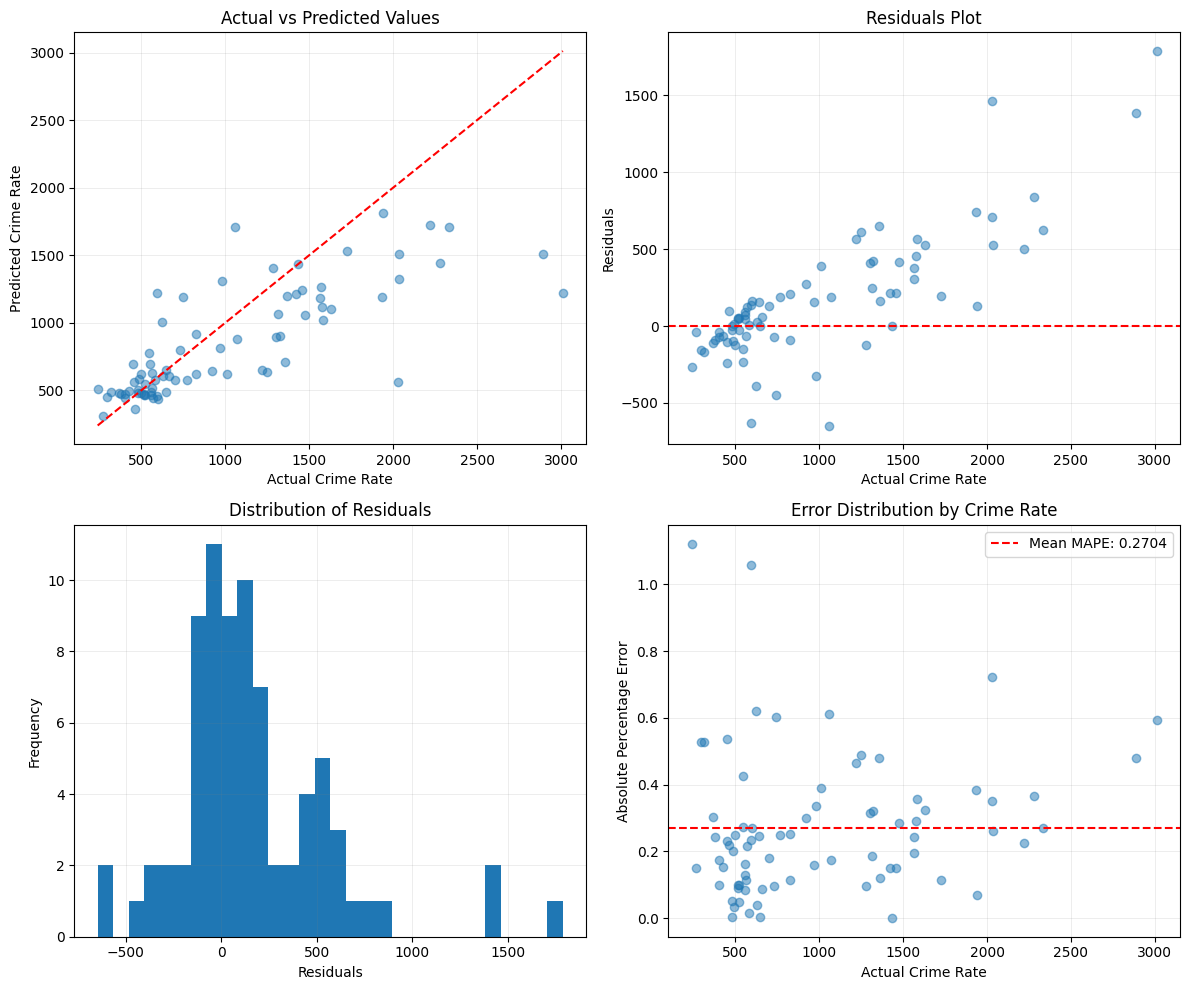

In [24]:
# XGB model using bayesian optimization for hyperparameter tuning
model_xg_full, top_xgb_feat_full = xgboost_bayes(X_gl, y_gl, title='Raw Features', save_plot=True)

Performance is ok, however, there's high variance in the error between the difference CAs --Absolute Percentage Error is quite high for some CAs (fourth plot)--

# Group Lasso on the full dataset

Original Labels
['Total Pop. 2000', 'Total Pop. 2010', 'Total Pop. 2020', 'Total Households 2020', 'Avg. Household Size 2020', 'Total Pop. 2022', 'Age Cohort', 'Pop. living in households', 'Pop. aged 16 and over', 'Employment Status', 'Mode of Travel to Work', 'Aggregate travel time to work', 'Vehicles Available', 'Pop. aged 25 and over', 'Education', 'Household Income', 'Household Occupancy', 'Housing Type', 'Housing Size', 'Housing Age', 'Home Value', 'Rent', 'Household PC & Net Access', 'Disability No.', 'Disability by Type', 'Disability by Age', 'Avg. Vehicles Miles', 'General Land Use', 'Household Size', 'Household Type', 'Nativity']

Group Numbers
[0, 1, 2, 3, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 8, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 12, 12, 12, 12, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22

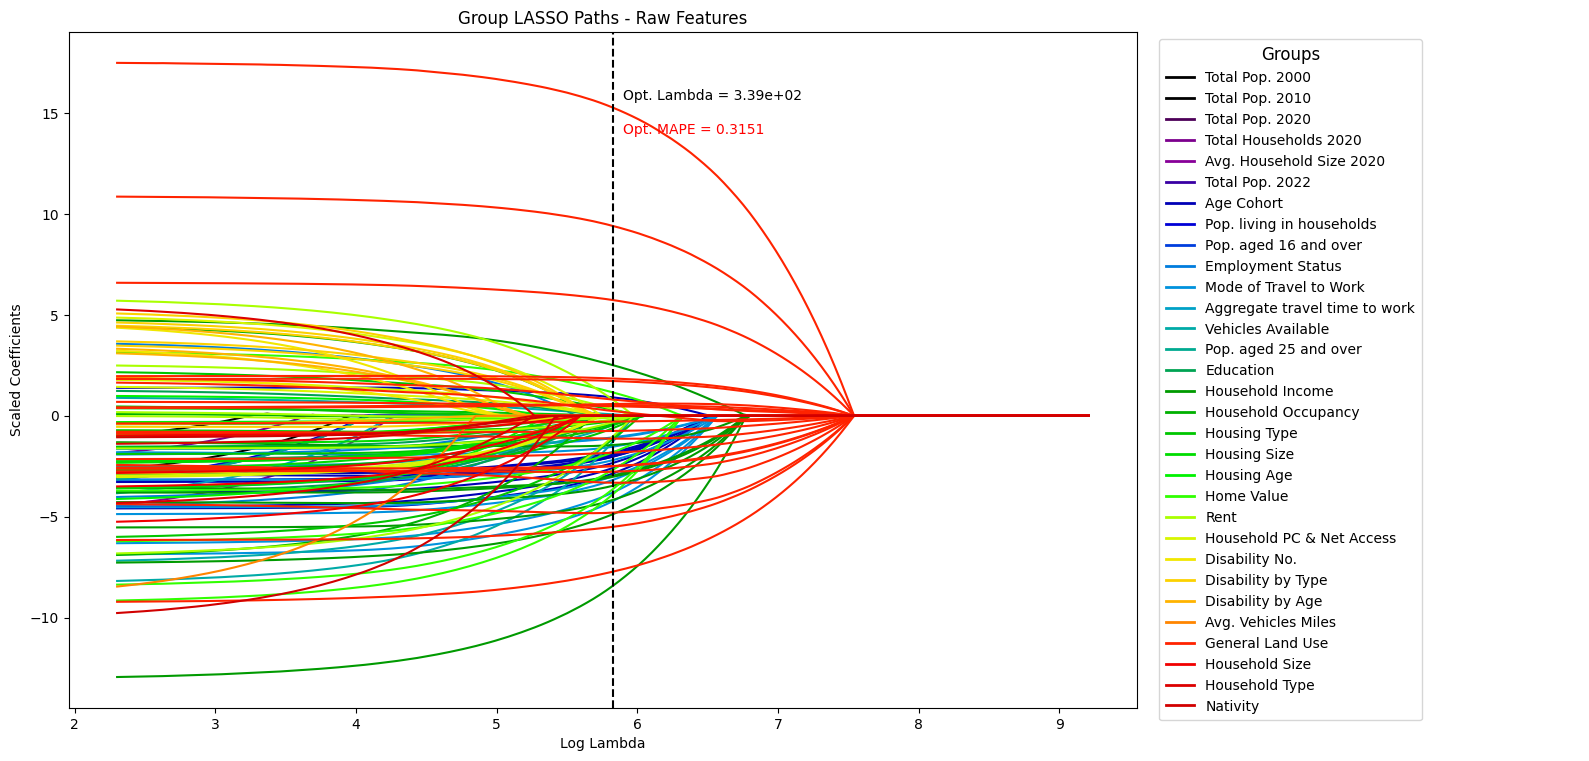

In [25]:
l1_reg = 0.001 #np.linspace(0,0.1,100)
title = f'Group LASSO Paths - Raw Features'
model_gl, coefs_gl, lam_gl, ypred_gl, feature_names_gl, group_names_gl, _, best_selected_features_gl = (
    glasso_paths(X_train_gl, y_train_gl, X_test_gl, groups_dict_original, group_names_original,
                 c_start=1, c_stop=4, c_num=150,
                 scoring='neg_mean_absolute_percentage_error',
                 l1_reg=l1_reg,
                 n_iter=50,
                 tol=1e-3,
                 cmap='nipy_spectral',
                 title=title,
                 verbose=True,
                 save_plot=True))

It's clear many coefs are driven to zero. Below is the coef analysis.

### Coef Analysis on top Group-Lasso predictor groups - Coefs sorted in descending order based on the mean of the absolute valute value of the group coefs

#### If we include Language variables, they would be the top coef group, and the model performance is much better , but we can't keep it. Both Lang and Race variables removed

In [26]:
group_lasso_analysis = coef_analysis(X_train_gl, coefs_gl, feature_names_gl, group_names_gl)
group_lasso_analysis

,group_name,mean_abs_coef,mean_coef,total_features,selected_features,group
0,Household Income,3.860,-3.233,8,8,18
1,General Land Use,3.319,0.168,21,21,32
2,Home Value,2.636,-2.171,5,5,23
3,Mode of Travel to Work,2.514,-2.514,8,8,13
4,Age Cohort,2.042,-1.839,9,9,8
5,Vehicles Available,0.730,-0.692,4,4,15
6,Rent,0.397,-0.075,7,7,24
7,Housing Type,0.388,-0.317,9,9,20
8,Housing Age,0.000,0.000,6,0,22
9,Household PC & Net Access,0.000,0.000,6,0,25


Only 6 groups selected

Default Model CV MAPE: 0.3306 ± 0.0505 (or 33.06% ± 5.05%)
Starting Bayesian optimization...
|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 2         | -0.3182   | 0.6624    | 0.02684   | 9.063     | 320.5     | 0.8832    |
| 14        | -0.3123   | 0.903     | 0.08209   | 7.565     | 321.6     | 0.7619    |
| 23        | -0.3064   | 0.7692    | 0.1614    | 6.11      | 123.7     | 0.8615    |
| 24        | -0.2959   | 0.9407    | 0.2754    | 6.591     | 123.3     | 0.9175    |

Best parameters:
colsample_bytree: 0.9406680398485827
learning_rate: 0.2753916746945442
max_depth: 7
n_estimators: 123
subsample: 0.917548115222402

Best Model CV MAPE: 0.2959 ± 0.0657 (or 29.59% ± 6.57%)
Improvement over baseline: 10.48%

Top 20 feature importances:
         Feature  Importance  Correlation  Signed_Importance
0         MEDINC    0.483537    -0.598838          -0.483537


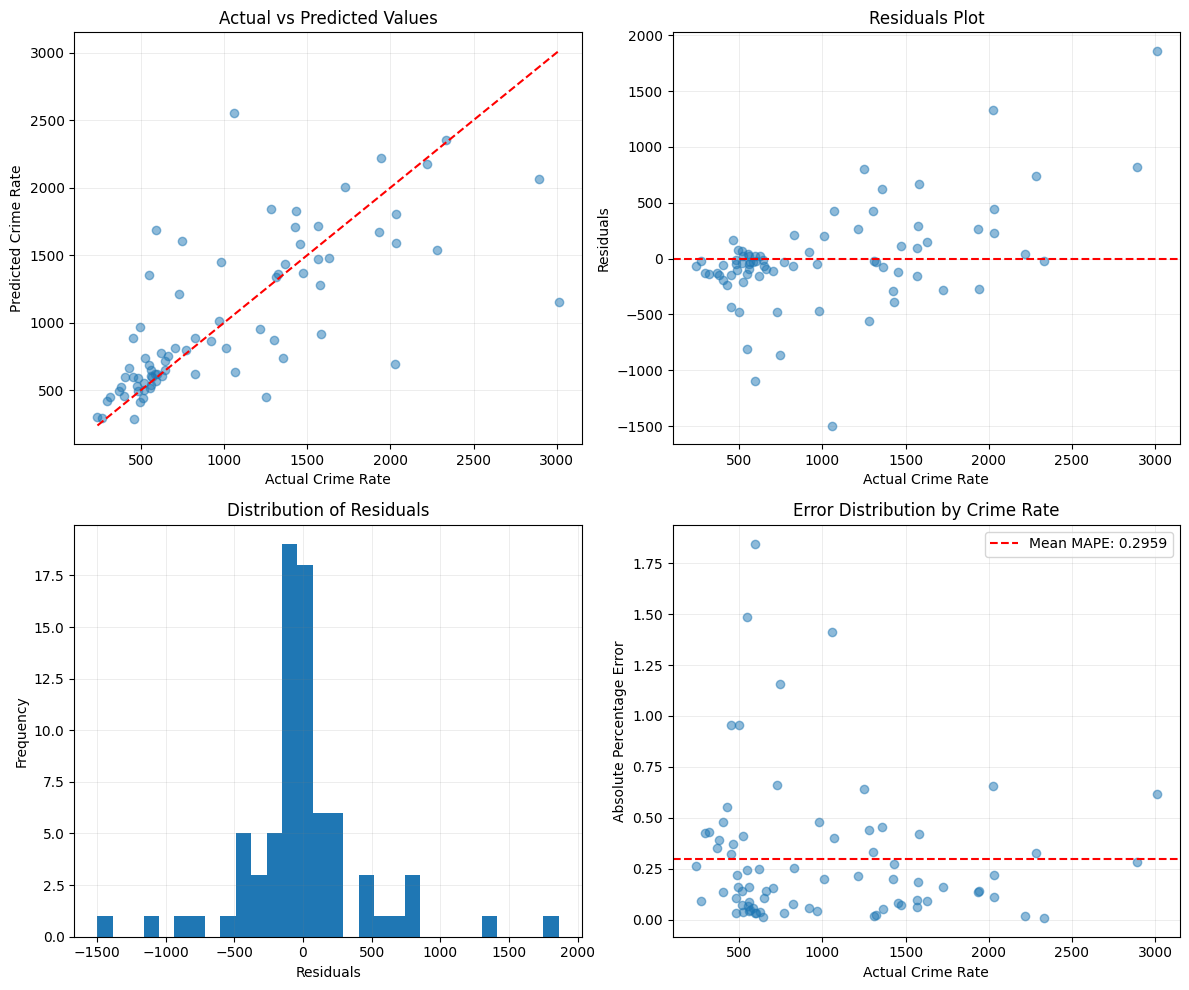

In [27]:
model_xg_gl, top_xgb_feat_gl = xgboost_bayes(X_gl.iloc[:, best_selected_features_gl], y_gl, title='Lasso selected raw features', save_plot=True)

Performance after group lasso slightly worse. The problem is not high dimensionality, it's the features themselves and potentially high multicollinearity.

# Import engineered features
### Engineered features seem more interpretable and useful. All created from existing variables, No PCA
### I included a hight number, I then used Lasso, not Group-Lasso.

In [28]:
distilled_df = create_distilled_features(merged_data)

In [29]:
distilled_df.columns.tolist()

['recent_population',
 'avg_household_size',
 'median_age',
 'age_dependency',
 'youth_ratio',
 'senior_ratio',
 'diversity_index',
 'largest_demo_pct',
 'hh_population_ratio',
 'employment_rate',
 'unemployment_rate',
 'labor_participation',
 'transit_use_rate',
 'work_from_home_rate',
 'car_commute_rate',
 'active_commute_rate',
 'avg_commute_time',
 'car_ownership_rate',
 'multi_car_rate',
 'zero_car_rate',
 'higher_education_rate',
 'hs_completion_rate',
 'college_exposure_rate',
 'median_income',
 'income_per_capita',
 'high_income_pct',
 'low_income_pct',
 'homeownership_rate',
 'rental_rate',
 'vacancy_rate',
 'single_family_pct',
 'small_multifamily_pct',
 'large_multifamily_pct',
 'median_rooms',
 'large_homes_pct',
 'small_homes_pct',
 'median_home_age',
 'new_housing_pct',
 'old_housing_pct',
 'median_home_value',
 'high_value_homes_pct',
 'median_rent',
 'high_rent_pct',
 'rent_to_income',
 'internet_access_rate',
 'broadband_rate',
 'digital_divide_rate',
 'disability_rate

In [30]:
X_l = distilled_df #[feat_keep_distilled]
y_l = merged_data['Crime_Rate']

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size=0.2, random_state=42)

### run xgboost model on the full set of engnineered features

Default Model CV MAPE: 0.2600 ± 0.0720 (or 26.00% ± 7.20%)
Starting Bayesian optimization...
|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 2         | -0.2549   | 0.6624    | 0.02684   | 9.063     | 320.5     | 0.8832    |
| 3         | -0.2321   | 0.6082    | 0.2913    | 8.827     | 145.6     | 0.6727    |
| 12        | -0.228    | 0.6302    | 0.2455    | 6.267     | 187.6     | 0.7195    |

Best parameters:
colsample_bytree: 0.6301857357366749
learning_rate: 0.24545217760350427
max_depth: 6
n_estimators: 188
subsample: 0.7194990574673508

Best Model CV MAPE: 0.2280 ± 0.0521 (or 22.80% ± 5.21%)
Improvement over baseline: 12.30%

Top 20 feature importances:
                    Feature  Importance  Correlation  Signed_Importance
0               rent_burden    0.570734     0.805110           0.570734
1              vacancy_rate    0.218998     0.804639          

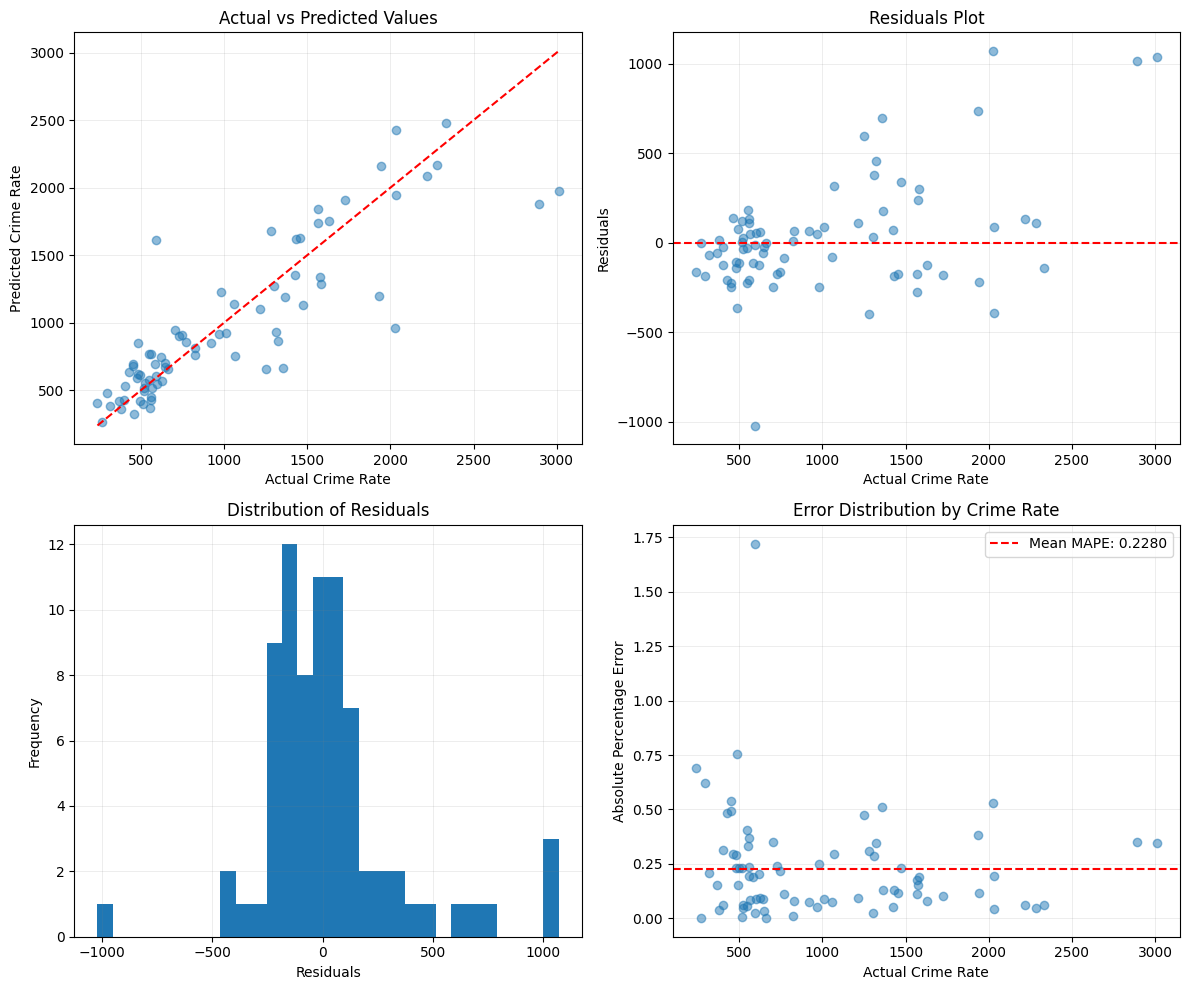

In [31]:
model_xg_engineered, top_xgb_feat_engineered = xgboost_bayes(X_l, y_l, title='egnineered features', save_plot=True)


The overall performance is not as bad the the full set of raw variables, however, we still have very high Absolute Percentage Error exceeding 100% (only one CA)

### Perform Lasso on the engineered features

Original Labels
['recent_population', 'avg_household_size', 'median_age', 'age_dependency', 'youth_ratio', 'senior_ratio', 'diversity_index', 'largest_demo_pct', 'hh_population_ratio', 'employment_rate', 'unemployment_rate', 'labor_participation', 'transit_use_rate', 'work_from_home_rate', 'car_commute_rate', 'active_commute_rate', 'avg_commute_time', 'car_ownership_rate', 'multi_car_rate', 'zero_car_rate', 'higher_education_rate', 'hs_completion_rate', 'college_exposure_rate', 'median_income', 'income_per_capita', 'high_income_pct', 'low_income_pct', 'homeownership_rate', 'rental_rate', 'vacancy_rate', 'single_family_pct', 'small_multifamily_pct', 'large_multifamily_pct', 'median_rooms', 'large_homes_pct', 'small_homes_pct', 'median_home_age', 'new_housing_pct', 'old_housing_pct', 'median_home_value', 'high_value_homes_pct', 'median_rent', 'high_rent_pct', 'rent_to_income', 'internet_access_rate', 'broadband_rate', 'digital_divide_rate', 'disability_rate', 'youth_disability_rate', 'se

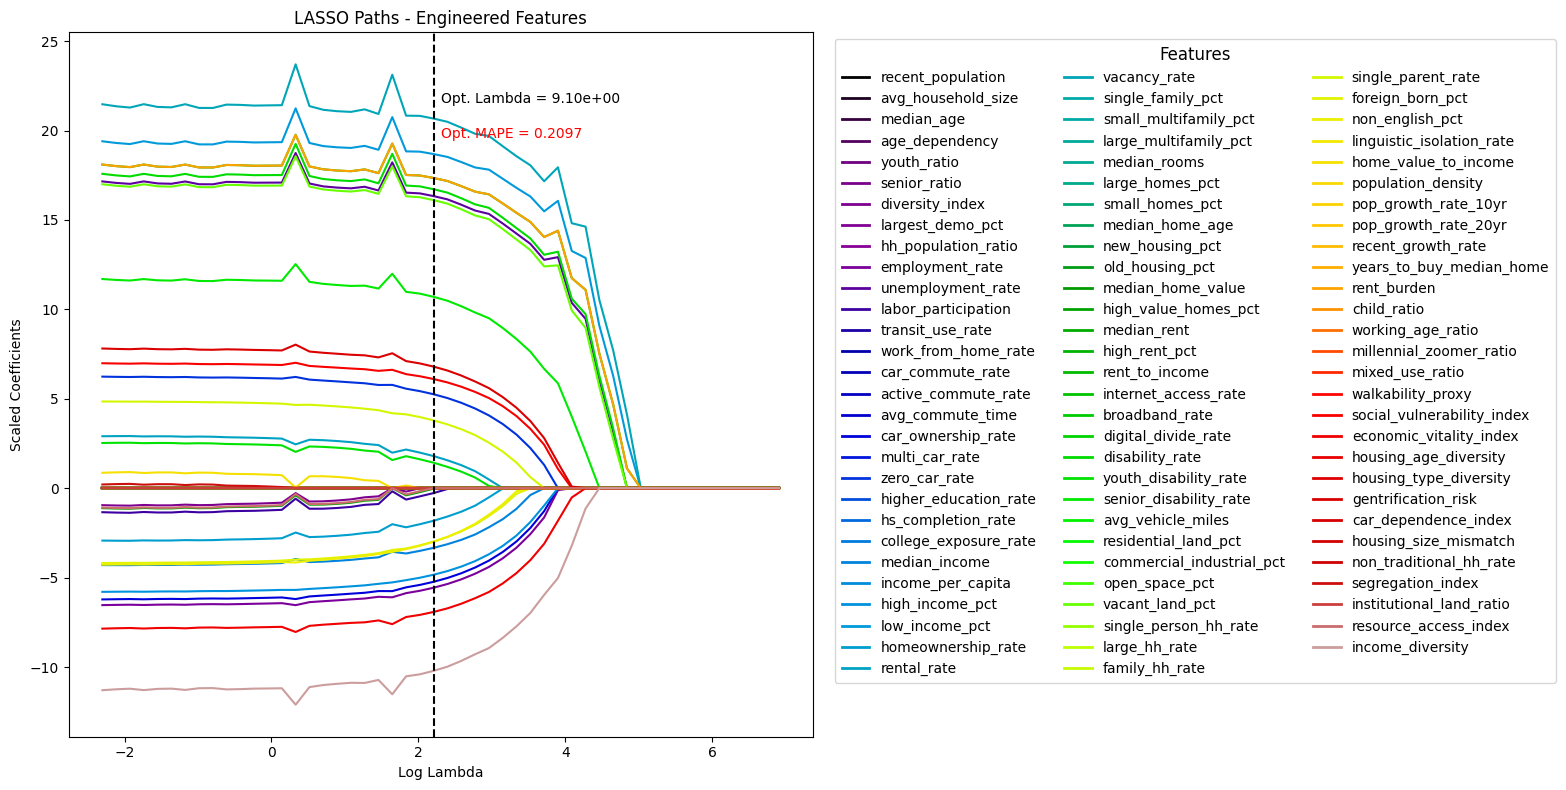

In [32]:
l1_reg = 150 #np.linspace(0,0.1,100) #150
title = f'LASSO Paths - Engineered Features'
model_l, coefs_l, lam_l, ypred_l, feature_names_l, group_names_l, _, best_selected_features_l = (
    glasso_paths(X_train_l, y_train_l, X_test_l,
                 c_start=-1, c_stop=3, c_num=50,
                 scoring='neg_mean_absolute_percentage_error',
                 l1_reg=l1_reg,
                 n_iter=50,
                 tol=1e-3,
                 cmap='nipy_spectral',
                 title=title,
                 verbose=True,
                 no_groups=True,
                 save_plot=True,
                 show_nonzero_only=False))

In [33]:
lasso_analysis_engineered_l = coef_analysis(X_train_l, coefs_l, feature_names_l, group_names_l)
lasso_analysis_engineered_l

,group_name,mean_abs_coef,mean_coef,total_features,selected_features,group
0,vacancy_rate,20.667,20.667,1,1,30
1,low_income_pct,18.683,18.683,1,1,27
2,rent_to_income,17.344,17.344,1,1,44
3,rent_burden,17.344,17.344,1,1,69
4,disability_rate,16.717,16.717,1,1,48
...,...,...,...,...,...,...
81,broadband_rate,0.000,0.000,1,0,46
82,digital_divide_rate,0.000,0.000,1,0,47
83,hh_population_ratio,0.000,0.000,1,0,9
84,youth_ratio,0.000,0.000,1,0,5


25 out of 77 features selected - Not bad. Let's check correlation between selected features

### Get correlation between selected features, and from each highly correlated pair, remove the one with lower lasso coef

In [34]:
feats = lasso_analysis_engineered_l['group_name'].tolist()[:17]
high_corr_engineered = corr_pairs(distilled_df, feats)

vacancy_rate & low_income_pct: 0.631
vacancy_rate & rent_to_income: 0.666
vacancy_rate & rent_burden: 0.666
vacancy_rate & disability_rate: 0.710
vacancy_rate & unemployment_rate: 0.658
vacancy_rate & vacant_land_pct: 0.646
vacancy_rate & senior_disability_rate: 0.557
vacancy_rate & economic_vitality_index: -0.537
vacancy_rate & social_vulnerability_index: 0.552
vacancy_rate & employment_rate: -0.568
vacancy_rate & zero_car_rate: 0.605
vacancy_rate & car_ownership_rate: -0.604
vacancy_rate & high_income_pct: -0.524
low_income_pct & rent_to_income: 0.892
low_income_pct & rent_burden: 0.892
low_income_pct & disability_rate: 0.726
low_income_pct & unemployment_rate: 0.875
low_income_pct & vacant_land_pct: 0.690
low_income_pct & senior_disability_rate: 0.600
low_income_pct & income_diversity: -0.632
low_income_pct & economic_vitality_index: -0.854
low_income_pct & gentrification_risk: 0.676
low_income_pct & social_vulnerability_index: 0.802
low_income_pct & employment_rate: -0.803
low_inco

## Removed features with high correlation and refit lasso

I for each pair of highly correlated features, I removed the one with the samler lasso coef.

Original Labels
['vacancy_rate', 'low_income_pct', 'rent_to_income', 'disability_rate', 'unemployment_rate', 'vacant_land_pct', 'income_diversity', 'economic_vitality_index', 'gentrification_risk', 'zero_car_rate', 'single_parent_rate', 'median_income', 'non_english_pct', 'foreign_born_pct', 'homeownership_rate', 'rental_rate', 'youth_disability_rate', 'labor_participation', 'high_value_homes_pct']

Group Numbers
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

(48, 19)
1/100 lambda: 1.00e+01 - MAPE = 0.2257, Selected features: 19
2/100 lambda: 1.05e+01 - MAPE = 0.2257, Selected features: 19
3/100 lambda: 1.10e+01 - MAPE = 0.2257, Selected features: 19
4/100 lambda: 1.15e+01 - MAPE = 0.2257, Selected features: 19
5/100 lambda: 1.20e+01 - MAPE = 0.2257, Selected features: 19
6/100 lambda: 1.26e+01 - MAPE = 0.2257, Selected features: 19
7/100 lambda: 1.32e+01 - MAPE = 0.2257, Selected features: 19
8/100 lambda: 1.38e+01 - MAPE = 0.2257, Selected features: 19
9/100 lam

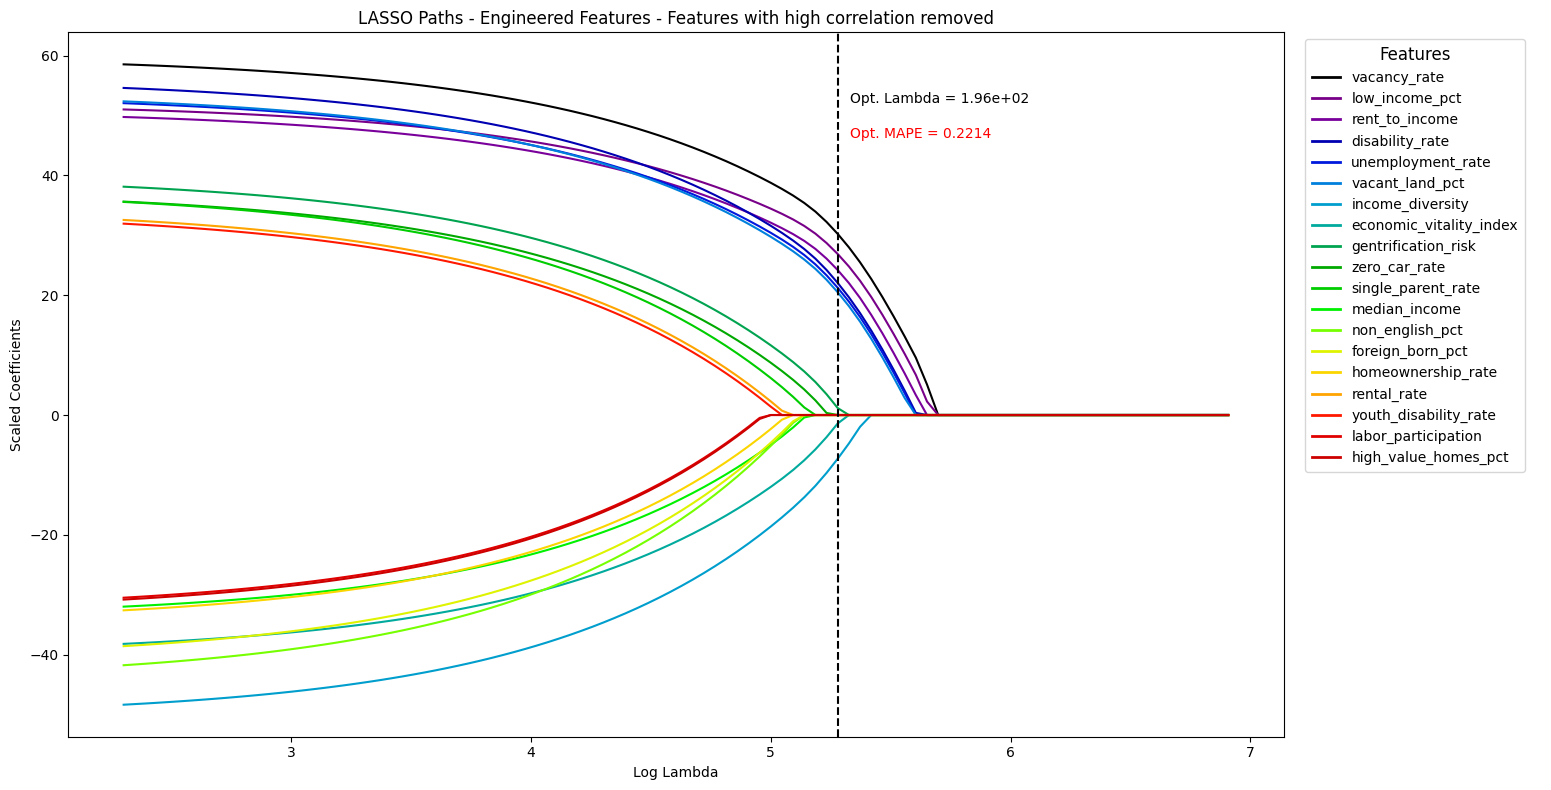

In [35]:
feat_keep_lpc = ['vacancy_rate', 'low_income_pct', 'rent_to_income', 'disability_rate', 'unemployment_rate', 'vacant_land_pct', 'income_diversity', 'economic_vitality_index', 'gentrification_risk', 'zero_car_rate', 'single_parent_rate', 'median_income', 'non_english_pct', 'foreign_born_pct', 'homeownership_rate', 'rental_rate', 'youth_disability_rate', 'labor_participation', 'high_value_homes_pct']

X_lpc = distilled_df[feat_keep_lpc]
y_lpc = merged_data['Crime_Rate']

X_train_lpc, X_test_lpc, y_train_lpc, y_test_lpc = train_test_split(X_lpc, y_lpc, test_size=0.2, random_state=42)

l1_reg = 0.1 #np.linspace(0,0.1,100) #150
title = f'LASSO Paths - Engineered Features - Features with high correlation removed'
model_lpc, coefs_lpc, lam_lpc, ypred_lpc, feature_names_lpc, group_names_lpc, _, best_selected_features_lpc = (
    glasso_paths(X_train_lpc, y_train_lpc, X_test_lpc,
                 c_start=1, c_stop=3, c_num=100,
                 scoring='neg_mean_absolute_percentage_error',
                 l1_reg=l1_reg,
                 n_iter=50,
                 tol=1e-3,
                 cmap='nipy_spectral',
                 title=title,
                 verbose=True,
                 no_groups=True,
                 save_plot=True,
                 show_nonzero_only=False))

In [36]:
lasso_analysis_engineered_lpc = coef_analysis(X_train_lpc, coefs_lpc, feature_names_lpc, group_names_lpc)
lasso_analysis_engineered_lpc

,group_name,mean_abs_coef,mean_coef,total_features,selected_features,group
0,vacancy_rate,30.223,30.223,1,1,1
1,low_income_pct,26.872,26.872,1,1,2
2,rent_to_income,24.189,24.189,1,1,3
3,disability_rate,22.045,22.045,1,1,4
4,unemployment_rate,21.239,21.239,1,1,5
5,vacant_land_pct,20.486,20.486,1,1,6
6,income_diversity,7.289,-7.289,1,1,7
7,economic_vitality_index,1.405,-1.405,1,1,8
8,gentrification_risk,1.156,1.156,1,1,9
9,homeownership_rate,0.000,0.000,1,0,15


9 features selected

### Get correlation between selected features

In [37]:
no_feat_lpc = best_selected_features_lpc.sum()
feats_lpc = lasso_analysis_engineered_lpc['group_name'].tolist()[:no_feat_lpc]
high_corr_engineered_lpc = corr_pairs(distilled_df, feats_lpc)

vacancy_rate & low_income_pct: 0.631
vacancy_rate & rent_to_income: 0.666
vacancy_rate & disability_rate: 0.710
vacancy_rate & unemployment_rate: 0.658
vacancy_rate & vacant_land_pct: 0.646
vacancy_rate & economic_vitality_index: -0.537
low_income_pct & rent_to_income: 0.892
low_income_pct & disability_rate: 0.726
low_income_pct & unemployment_rate: 0.875
low_income_pct & vacant_land_pct: 0.690
low_income_pct & income_diversity: -0.632
low_income_pct & economic_vitality_index: -0.854
low_income_pct & gentrification_risk: 0.676
rent_to_income & disability_rate: 0.675
rent_to_income & unemployment_rate: 0.750
rent_to_income & vacant_land_pct: 0.679
rent_to_income & income_diversity: -0.513
rent_to_income & economic_vitality_index: -0.734
rent_to_income & gentrification_risk: 0.818
disability_rate & unemployment_rate: 0.717
disability_rate & vacant_land_pct: 0.536
disability_rate & economic_vitality_index: -0.730
unemployment_rate & vacant_land_pct: 0.668
unemployment_rate & income_divers

Correlations are acceptable.

### Fit XGboost model

Default Model CV MAPE: 0.2569 ± 0.0524 (or 25.69% ± 5.24%)
Starting Bayesian optimization...
|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 3         | -0.2548   | 0.6082    | 0.2913    | 8.827     | 145.6     | 0.6727    |
| 4         | -0.246    | 0.6734    | 0.09823   | 6.673     | 244.4     | 0.7165    |
| 8         | -0.2354   | 0.8336    | 0.02386   | 3.251     | 97.04     | 0.6933    |
| 22        | -0.2324   | 0.8265    | 0.02513   | 5.549     | 123.5     | 0.662     |

Best parameters:
colsample_bytree: 0.8264624273956631
learning_rate: 0.025125779338687974
max_depth: 6
n_estimators: 123
subsample: 0.6619695861244522

Best Model CV MAPE: 0.2324 ± 0.0494 (or 23.24% ± 4.94%)
Improvement over baseline: 9.55%

Top 20 feature importances:
                   Feature  Importance  Correlation  Signed_Importance
0        unemployment_rate    0.215414     0.7730

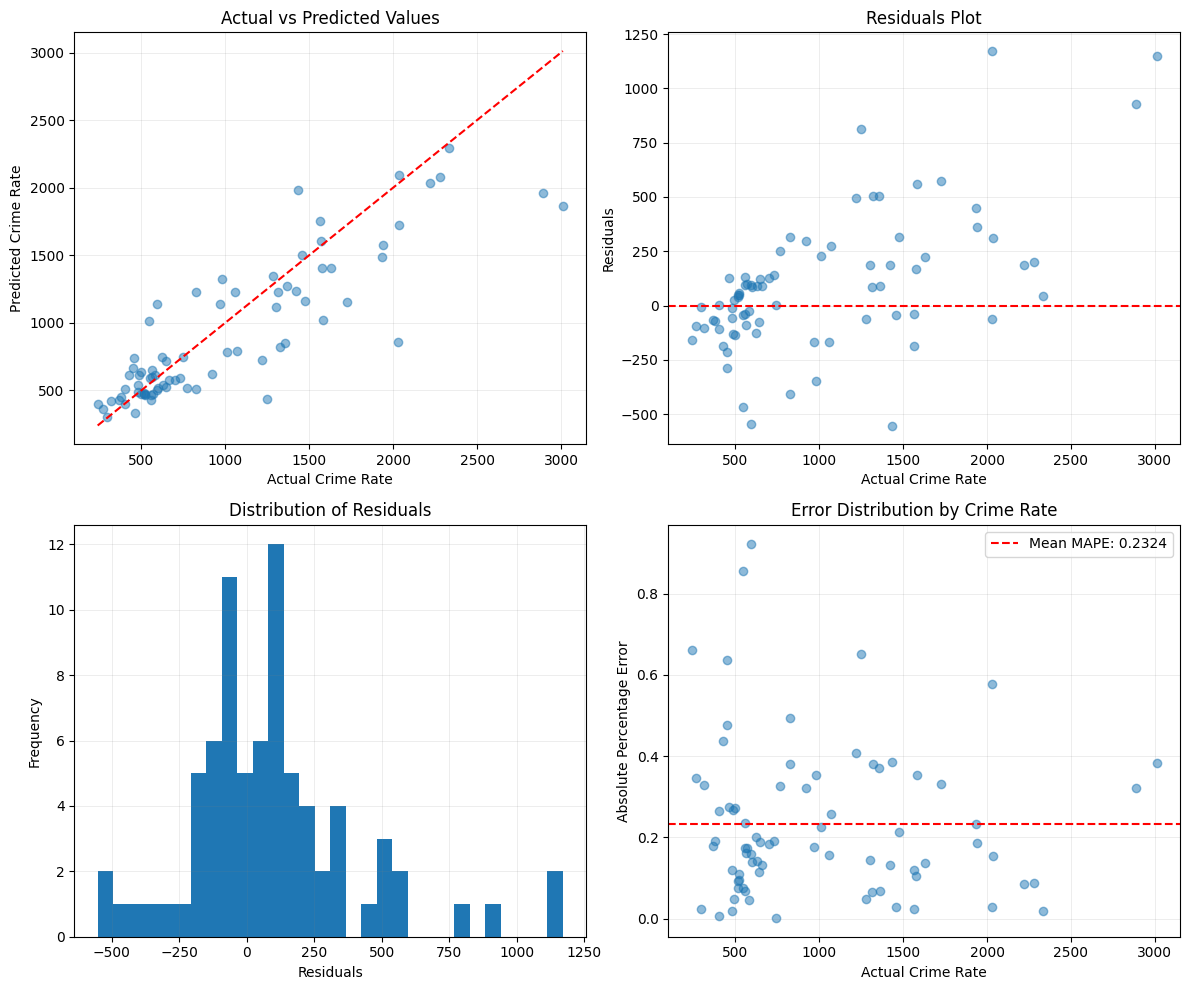

In [38]:
best_selected_features_lpc = best_selected_features_lpc.copy()
model_xg_engineered_lpc, top_xgb_feat_engineered_lpc = xgboost_bayes(X_lpc.iloc[:, best_selected_features_lpc], y_lpc, title='Lasso selected egnineered features', save_plot=True)


MAPE improved as well as stdv of the Absolute percentage error. The highest is slightly above 70%, much improved from the 160% we had.

We have a set of highly predictive variables chosen by lasso, which only captures the linear patterns in the data - it's still good though because the lasso performance (which is measured on a ridge model, ie, we use lasso to select features, but fit a ridge modlel to measure performance) is comparable to that of the xgboost, although not obtained with the same robustness as xgboost (not cross validated, which usually decreases performance).

We also have the most important features determined by xgboost model, which captures non-linear patterns. We can work off these sets of variables

# Export features

### Top features' sorted by importance - Weights and correlation factors

In [39]:
# top features

export_features = top_xgb_feat_engineered_lpc.copy().drop(columns='Importance')
export_features.rename(columns={'Signed_Importance': 'Importance'}, inplace=True)
export_features = export_features[['Feature', 'Importance', 'Correlation']]
print(export_features)

                   Feature  Importance  Correlation
0        unemployment_rate    0.215414     0.773076
1           rent_to_income    0.208613     0.805110
2  economic_vitality_index   -0.193885    -0.641887
3             vacancy_rate    0.193797     0.804639
4          disability_rate    0.071296     0.746566
5      gentrification_risk    0.043148     0.624474
6          vacant_land_pct    0.032564     0.688105
7         income_diversity   -0.023944    -0.588662
8           low_income_pct    0.017339     0.782635


### Top features per Community Area

In [64]:
merged_data['GEOG']

0            Rogers Park
1             West Ridge
2                 Uptown
3         Lincoln Square
4           North Center
             ...        
72    Washington Heights
73       Mount Greenwood
74           Morgan Park
75                O'Hare
76             Edgewater
Name: GEOG, Length: 77, dtype: object

In [65]:
top_feats_sorted = export_features['Feature'].tolist()

top_feats_per_ca = pd.concat([merged_data[['CA', 'GEOG']], y_l, distilled_df[top_feats_sorted]], axis=1)
top_feats_per_ca

,CA,GEOG,Crime_Rate,unemployment_rate,rent_to_income,economic_vitality_index,vacancy_rate,disability_rate,gentrification_risk,vacant_land_pct,income_diversity,low_income_pct
0,1,Rogers Park,703.099159,0.057745,0.251936,0.577191,0.105226,0.105060,0.296764,0.002479,0.821293,0.219397
1,2,West Ridge,453.580042,0.063481,0.237410,0.579971,0.076194,0.088400,0.288405,0.003798,0.830822,0.167144
2,3,Uptown,648.193487,0.044513,0.222611,0.656365,0.087855,0.131561,0.301526,0.006837,0.826906,0.231679
3,4,Lincoln Square,478.984541,0.059515,0.199693,0.803002,0.055818,0.062856,0.303079,0.002633,0.819643,0.104657
4,5,North Center,378.339124,0.036262,0.140268,0.964252,0.089786,0.057994,0.282164,0.007711,0.695284,0.083206
...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Washington Heights,1216.796330,0.124318,0.203259,0.465563,0.106946,0.188275,0.184412,0.022915,0.827767,0.198267
73,74,Mount Greenwood,296.918617,0.061340,0.145632,0.721056,0.039394,0.109409,0.146781,0.001380,0.782108,0.084670
74,75,Morgan Park,919.569527,0.089544,0.240080,0.554348,0.062923,0.125087,0.293793,0.030861,0.827675,0.185293
75,76,O'Hare,1251.080638,0.044048,0.235809,0.649692,0.033702,0.074001,0.278564,0.000040,0.817951,0.118597


In [66]:
'''top_feats_per_ca.to_csv('top_features_per_CA_sorted.csv', index=False)'''


In [40]:
# Create a dictionary mapping feature names to their descriptions
feature_descriptions = {
    'unemployment_rate': 'Ratio of unemployed individuals to the total labor force. Calculated as UNEMP / IN_LBFRC.',

    'rent_to_income': 'Annual median rent as a proportion of median household income. Calculated as (MED_RENT * 12) / MEDINC.',

    'economic_vitality_index': 'Composite indicator averaging normalized values of employment rate, higher education rate, high income percentage, and percentage of households not in poverty. Higher values indicate stronger economic conditions.',

    'vacancy_rate': 'Percentage of housing units that are vacant. Calculated as VAC_HU / HU_TOT.',

    'disability_rate': 'Percentage of total population with any disability. Calculated as DISAB_ANY / recent_population.',

    'gentrification_risk': "Indicator of how likely an area is experiencing or may experience gentrification. It combines multiple housing affordability factors: how much of residents' income goes to rent, how expensive homes are compared to local incomes, the percentage of high-cost rental units, and how much recent housing development has occurred. Higher values suggest greater housing cost pressures that could displace existing residents.",

    'vacant_land_pct': 'Percentage of total land area that is vacant. Corresponds to VACperc in the original dataset.',

    'income_diversity': 'Measure of how evenly distributed household incomes are across different income brackets. A higher value means the area has a good mix of income levels (from low to high) rather than being concentrated in just one income group. Areas with low values tend to be economically homogeneous, while areas with high values have a more economically diverse population.',

    'low_income_pct': 'Percentage of households with income less than $25,000. Calculated as INC_LT_25K / TOT_HH.'
}

# Add the Description column to the DataFrame
export_features['Description'] = export_features['Feature'].map(feature_descriptions)

In [41]:
'''export_features.to_csv('top_features.csv', index=False)'''

"export_features.to_csv('top_features.csv', index=False)"

In [42]:
# crime rate per crime type per month - 2015-2025
detailed_crime = crime_rate_month(merged_data, data_csv_clean)

'''detailed_crime.to_csv('crime_rate_by_crime_type.csv', index=False)'''

"detailed_crime.to_csv('crime_rate_by_crime_type.csv', index=False)"

In [43]:
# groups crimes into broader categories - 9 groups in total (from 35 crime type)
crime_map = {
    'ARSON': 'Property Crimes',
    'BURGLARY': 'Property Crimes',
    'MOTOR_VEHICLE_THEFT': 'Property Crimes',
    'THEFT': 'Property Crimes',
    'CRIMINAL_DAMAGE': 'Property Crimes',
    'CRIMINAL_TRESPASS': 'Property Crimes',

    'ASSAULT': 'Violent Crimes',
    'BATTERY': 'Violent Crimes',
    'HOMICIDE': 'Violent Crimes',
    'KIDNAPPING': 'Violent Crimes',
    'ROBBERY': 'Violent Crimes',
    'INTIMIDATION': 'Violent Crimes',
    'STALKING': 'Violent Crimes',

    'NARCOTICS': 'Drug-Related Crimes',
    'OTHER_NARCOTIC_VIOLATION': 'Drug-Related Crimes',

    'CRIMINAL_SEXUAL_ASSAULT': 'Sex-Related Crimes',
    'CRIM_SEXUAL_ASSAULT': 'Sex-Related Crimes',
    'SEX_OFFENSE': 'Sex-Related Crimes',
    'PROSTITUTION': 'Sex-Related Crimes',
    'OFFENSE_INVOLVING_CHILDREN': 'Sex-Related Crimes',
    'PUBLIC_INDECENCY': 'Sex-Related Crimes',
    'OBSCENITY': 'Sex-Related Crimes',

    'INTERFERENCE_WITH_PUBLIC_OFFICER': 'Public Order Crimes',
    'PUBLIC_PEACE_VIOLATION': 'Public Order Crimes',
    'WEAPONS_VIOLATION': 'Public Order Crimes',
    'RITUALISM': 'Public Order Crimes',

    'DECEPTIVE_PRACTICE': 'Fraud & Financial Crimes',
    'GAMBLING': 'Fraud & Financial Crimes',

    'NON-CRIMINAL': 'Non-Criminal',
    'NON-CRIMINAL_(SUBJECT_SPECIFIED)': 'Non-Criminal',
    'NON_-_CRIMINAL': 'Non-Criminal',

    'CONCEALED_CARRY_LICENSE_VIOLATION': 'Other Crimes',
    'LIQUOR_LAW_VIOLATION': 'Other Crimes',
    'OTHER_OFFENSE': 'Other Crimes',

    'HUMAN_TRAFFICKING': 'Other Crimes'
}

# add a new column with the broader crime category
detailed_crime['Crime_Category'] = detailed_crime['Crime_Type'].map(crime_map)

# group by CA, Year, Month, and Crime_Category, summing counts and crime rates
aggregated_crime = (detailed_crime
                    .groupby(['CA', 'Year', 'Month', 'Time_ID', 'Crime_Category'], as_index=False)
                    .agg({'Crime_Count': 'sum', 'Crime_Rate': 'sum'}))

aggregated_crime


,CA,Year,Month,Time_ID,Crime_Category,Crime_Count,Crime_Rate
0,1,2015,1,2015-01,Drug-Related Crimes,19,0.343521
1,1,2015,1,2015-01,Fraud & Financial Crimes,26,0.470082
2,1,2015,1,2015-01,Other Crimes,21,0.379682
3,1,2015,1,2015-01,Property Crimes,123,2.223849
4,1,2015,1,2015-01,Public Order Crimes,4,0.072320
...,...,...,...,...,...,...,...
61682,77,2025,1,2025-01,Non-Criminal,1,0.017799
61683,77,2025,1,2025-01,Other Crimes,8,0.142390
61684,77,2025,1,2025-01,Property Crimes,50,0.889936
61685,77,2025,1,2025-01,Public Order Crimes,1,0.017799


In [44]:
'''aggregated_crime.to_csv('crime_rate_by_crime_group.csv', index=False)'''

"aggregated_crime.to_csv('crime_rate_by_crime_group.csv', index=False)"